# Lambda vs Accuracy

In [14]:
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection
import numpy as np

def plot_lambda_src_test(lambda_, source_results, target_results):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(lambda_, source_results, color='tab:blue', label='White', marker ='o')
    ax.plot(lambda_, target_results, color='tab:orange', label='Black', marker ='o')
    ax.set_xlabel('Lambda')
    ax.legend()
    print('here')
    plt.show()
    

In [15]:
def plot_lambda_line(lambda_, results):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(lambda_, results, color='tab:blue', label='White', marker ='o')
    ax.set_xlabel('Lambda')
    ax.legend()

    plt.show()

In [1]:
lam = [x * .1 for x in range(10)]
src = [x * .2 for x in range(10)]
targ = [x * .3 for x in range(10)]

In [17]:
import os

files = ['results_mult_0.0.txt','results_mult_0.1.txt','results_mult_0.2.txt','results_mult_0.30000000000000004.txt',
         'results_mult_0.4.txt','results_mult_0.5.txt',  'results_mult_0.6000000000000001.txt',
        'results_mult_0.7000000000000001.txt', 'results_mult_0.8.txt']
folder_path = '../'

results = {}
for filename in files:
    with open(os.path.join(folder_path, filename), "r") as f:
            data = f.read().splitlines()
            print(data)
            print()
            

            # Remove newlines and split each line into its components
            data = [line.strip().split(": ") for line in data]
            data_pairs = [d for d in data if len(d)> 1]
            print(data)

            # Convert the numerical values to floats
            for i in range(1,4):
                print(i)
                metric = 'label_acc_'
                data_pairs[i][0] = metric + data_pairs[i][0]
                data_pairs[i][1] = float(data_pairs[i][1])
            for i in range(4, 7):
                print(i)
                metric = 'domain_acc_'
                data_pairs[i][0] = metric + data_pairs[i][0]
                data_pairs[i][1] = float(data_pairs[i][1])
            for i in range(7, 11):
                print(i)
                metric = 'fairness_'
                data_pairs[i][0] = metric + data_pairs[i][0]
                data_pairs[i][1] = float(data_pairs[i][1])
            

            # Create a dictionary from the data
            d = dict(data_pairs)
            print(d)

            # Add the Lambda value to the dictionary
            #d["Lambda"] = lambda_val

            # Add the dictionary to the results
            results[float(d['Lambda'])] = d

['Lambda: 0.0', '', 'Label Classifier Accuracy (Test Data) ', 'Source (White): 93.6279218699968', 'Target (Black): 92.36363636363636', 'Overall: 93.43860604410564', '', 'Domain Classifier Accuracy (Test Data) ', 'Source (White): 77.93788024335575', 'Target (Black): 75.63636363636364', 'Overall: 77.59324802613668', '', 'False Positive Rate (Test Data) ', 'Source (White): 4.384362440628426', 'Target (Black): 7.5718015665796345', '(Black FPR) / (White FPR): 1.727001740644038', 'Overall: 4.7756410256410255', '']

[['Lambda', '0.0'], [''], ['Label Classifier Accuracy (Test Data)'], ['Source (White)', '93.6279218699968'], ['Target (Black)', '92.36363636363636'], ['Overall', '93.43860604410564'], [''], ['Domain Classifier Accuracy (Test Data)'], ['Source (White)', '77.93788024335575'], ['Target (Black)', '75.63636363636364'], ['Overall', '77.59324802613668'], [''], ['False Positive Rate (Test Data)'], ['Source (White)', '4.384362440628426'], ['Target (Black)', '7.5718015665796345'], ['(Black 

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8]
[93.6279218699968, 95.38904899135447, 93.78802433557476, 93.94812680115274, 93.94812680115274, 95.29298751200768, 93.40377841818764, 94.04418828049953, 94.58853666346462]
[92.36363636363636, 94.72727272727273, 91.45454545454545, 94.36363636363636, 93.0909090909091, 94.36363636363636, 91.0909090909091, 92.9090909090909, 91.81818181818181]
here


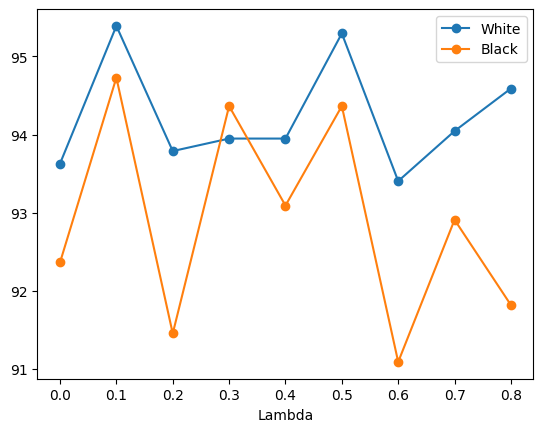

In [18]:
# Plot accuracies

lambda_vals = [v for v in results]
source_accuracy = [results[v]['label_acc_Source (White)'] for v in results]
target_accuracy = [results[v]['label_acc_Target (Black)'] for v in results]
print(lambda_vals)
print(source_accuracy)
print(target_accuracy)
plot_lambda_src_test(lambda_vals, source_accuracy, target_accuracy)

here


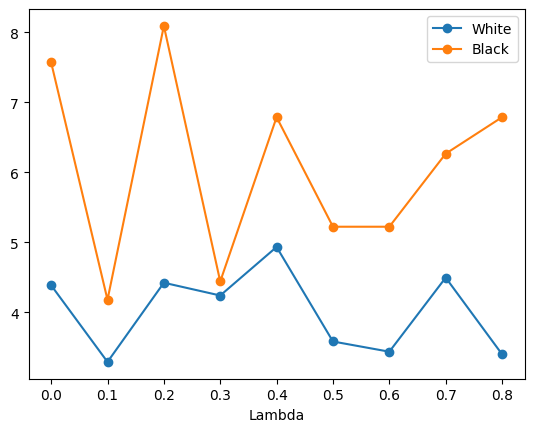

In [19]:
# Plot false negatives
lambda_vals = [v for v in results]
source_fn = [results[v]['fairness_Source (White)'] for v in results]
target_fn = [results[v]['fairness_Target (Black)'] for v in results]
plot_lambda_src_test(lambda_vals, source_fn, target_fn)

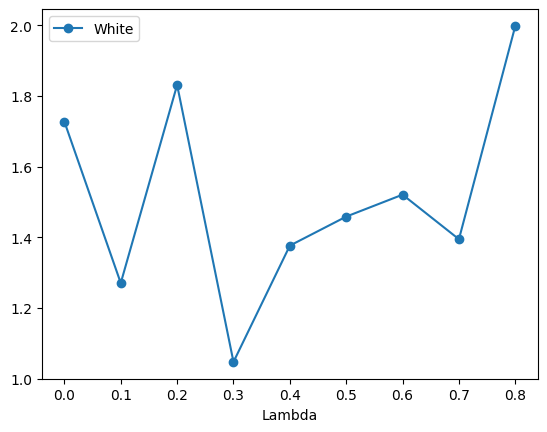

In [20]:
# Plot ratios
ratios = [results[v]['fairness_(Black FPR) / (White FPR)'] for v in results]
plot_lambda_line(lambda_vals, ratios)


here


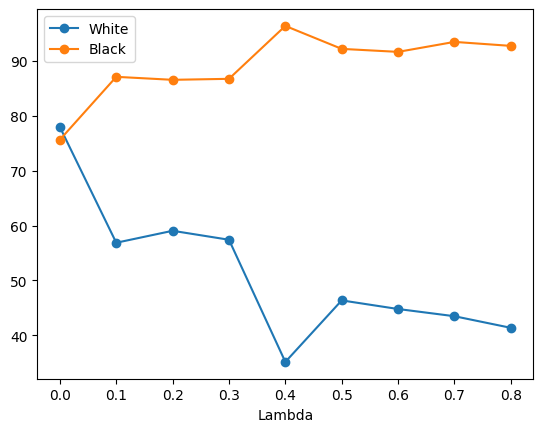

In [21]:
# Plot domain acc
lambda_vals = [v for v in results] 
source_fn = [results[v]['domain_acc_Source (White)'] for v in results]
target_fn = [results[v]['domain_acc_Target (Black)'] for v in results]
plot_lambda_src_test(lambda_vals, source_fn, target_fn)

In [ ]:
# Add confidence intervals--
# 

In [16]:
def get_conf_data(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            #print(line)
            #print(data)
            if line.startswith('Lambda:'):
                lamb = float(line.split(': ')[1])
            elif line.startswith('run:'):
                run = int(line.split()[1].split('/')[0])
                accs = []
            elif line.startswith('Label Classifier Accuracy (Test Data)'):
                #accs.append(('source', float(next(f).strip().split()[1])))
                line = next(f).strip()
                value = line.split(":")[1].strip()  # extract the substring after the colon
                accs.append(('label_source', float(value)))
                line = next(f).strip()
                value = line.split(":")[1].strip()  # extract the substring after the colon
                accs.append(('label_target', float(value)))
                line = next(f).strip()
                value = line.split(":")[1].strip()  # extract the substring after the colon
                accs.append(('label_overall', float(value)))
            elif line.startswith('Domain Classifier Accuracy (Test Data)'):
                line = next(f).strip()
                value = line.split(":")[1].strip()  # extract the substring after the colon
                accs.append(('domain_source', float(value)))
                line = next(f).strip()
                value = line.split(":")[1].strip()  # extract the substring after the colon
                accs.append(('domain_target', float(value)))
                line = next(f).strip()
                value = line.split(":")[1].strip()  # extract the substring after the colon
                accs.append(('domain_overall', float(value)))
            elif line.startswith('False Positive Rate (Test Data)'):
                line = next(f).strip()
                value = line.split(":")[1].strip()  # extract the substring after the colon
                accs.append(('fpr_source', float(value)))
                line = next(f).strip()
                value = line.split(":")[1].strip()  # extract the substring after the colon
                accs.append(('fpr_target', float(value)))
                line = next(f).strip()
                value = line.split(":")[1].strip()  # extract the substring after the colon
                accs.append(('fpr_ratio', float(value)))
                line = next(f).strip()
                value = line.split(":")[1].strip()  # extract the substring after the colon
                accs.append(('fpr_overall', float(value)))
                data.append({'Lambda': lamb, 'run': run, 'accuracy': dict(accs)})
        return data


[94.14451915892838, 94.30462162450632, 94.11890276443592, 93.84139182410077, 94.08474757177927, 93.96947379656312]
[1.253858145175883, 0.5515292318001457, 0.7795428206212023, 0.836111969058436, 0.96287121426667, 0.8152943221752196]
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5]


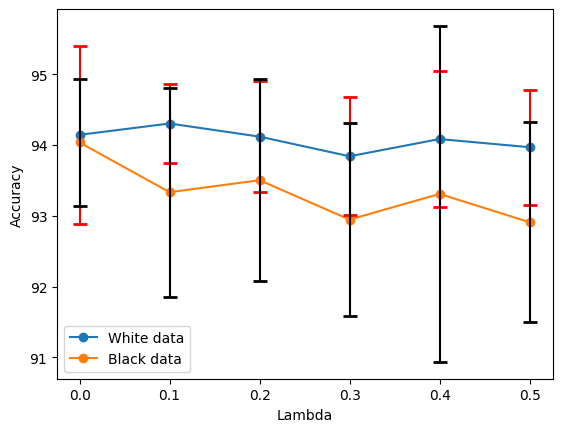

[1.1531713150897929, 0.5419780138046519, 0.801806431171002, 0.8380379345395284, 1.1322278322107024, 0.8188524517513542]


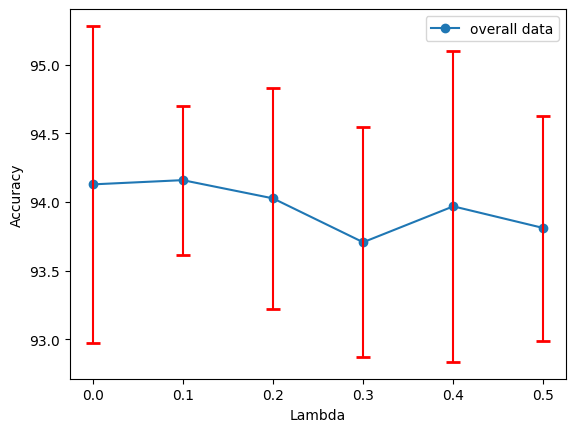

In [122]:
files = ['../results_conf_0.0.txt', '../results_conf_0.1.txt','../results_conf_0.2.txt', '../results_conf_0.30000000000000004.txt',
        '../results_conf_0.4.txt', '../results_conf_0.5.txt']
results = []
for file in files:
    data = get_conf_data(file)
    new_data = {'Lambda': data[0]['Lambda']}
    for key in data[0]['accuracy']:
        new_data[key] = []

    for i in range(15):
        for key in data[0]['accuracy']:
            new_data[key].append(data[i]['accuracy'][key])
    results.append(new_data)
    
#print(results)
my_stats = []
for res in results:
    info = get_stats(res)
    my_stats.append(info)

# plot results
white_label_means = [stats['label_source'][0] for stats in my_stats]
white_ci = [stats['label_source'][2][1]- stats['label_source'][2][0] for stats in my_stats]
#white_ci = [stats[0] for stats in white_ci]
black_label_means = [stats['label_target'][0] for stats in my_stats]
black_ci = [stats['label_target'][2][1]- stats['label_target'][2][0] for stats in my_stats]
#black_ci = [stats[0] for stats in black_ci]
lams = [0.1*i for i in range(len(my_stats))]
print(white_label_means)
print(white_ci)
print(lams)

stat = my_stats[0]
ci = stat['label_source'][2][1]- stat['label_source'][2][0]

plot_with_error(lams, white_label_means, white_ci, black_label_means, black_ci)

overall_means = [stats['label_overall'][0] for stats in my_stats]
ci = [stats['label_overall'][2][1]- stats['label_overall'][2][0] for stats in my_stats]
print(ci)
plot_single_with_error(lams, overall_means, ci)




In [123]:
import math
import numpy as np
from scipy import stats

def get_stats(data):
    info = {}
    for key in data:
        if key == 'Lambda':
            continue
        #print(key)
        values = data[key]
        # Calculate the mean
        mean_acc = np.mean(values)
        #print("Mean accuracy: {:.2f}".format(mean_acc))

        # Calculate the standard deviation
        std_acc = np.std(values)
        #print("Standard deviation: {:.2f}".format(std_acc))

        # Calculate the 95% confidence interval
        n = len(values)
        se = std_acc / math.sqrt(n)
        ci = stats.t.interval(0.95, n-1, loc=mean_acc, scale=se)
        #print("95% confidence interval: ({:.2f}, {:.2f})".format(ci[0], ci[1]))
        info[key] = [mean_acc, std_acc, (ci[0], ci[1])]
    return info

        
        

In [124]:
import matplotlib.pyplot as plt
import numpy as np

def plot_with_error(lams, white_means, white_ci, black_means, black_ci):
    # Plot the means as lines
    x = lams
    
    plt.plot(x, white_means, '-o', label='White data')
    plt.plot(x, black_means, '-o', label='Black data')

    # Add error bars for the confidence intervals
    plt.errorbar(x, white_means, yerr=white_ci, fmt='none', capsize=5, capthick=2, ecolor='red', color='red')
    plt.errorbar([i+.001 for i in x], black_means, yerr=black_ci, fmt='none', capsize=5, capthick=2, ecolor='black')

    # Add labels and legend
    plt.xlabel('Lambda')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plot
    plt.show()


In [125]:
def plot_single_with_error(lams, means, ci):
    # Plot the means as lines
    x = lams
    
    plt.plot(x, means, '-o', label='overall data')

    # Add error bars for the confidence intervals
    plt.errorbar(x, means, yerr=ci, fmt='none', capsize=5, capthick=2, ecolor='red', color='red')
    
    # Add labels and legend
    plt.xlabel('Lambda')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plot
    plt.show()


# GET PARITY RATIO AND DIFFERENCE

In [106]:
def add_parity(data):
    for lambda_val in range len(data):
        current = data[lambda_val]
        accuracy_white = current['label_source']
        true_positive_white = 
        true_negative_white =
    for i in range(15):
        
    
    [stats['label_source'][0] for stats in my_stats] # List of means

SyntaxError: invalid syntax (4049318192.py, line 2)

# Make Label Accuracy Plot

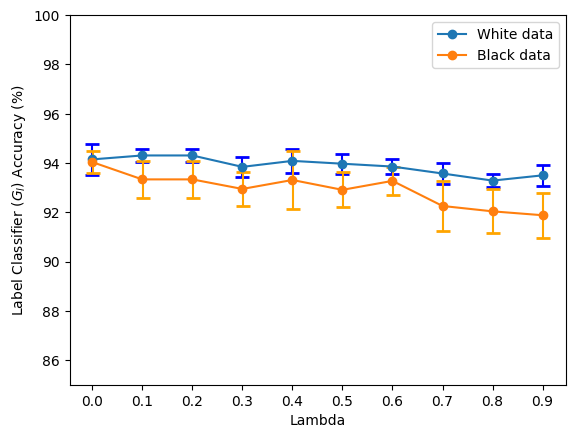

In [246]:
files = ['../results_conf_0.0.txt', '../results_conf_0.1.txt','../results_conf_0.1.txt',
         '../results_conf_0.30000000000000004.txt',
        '../results_conf_0.4.txt', '../results_conf_0.5.txt', '../results_conf_0.6000000000000001.txt', 
         '../results_conf_0.7000000000000001.txt', '../results_conf_0.8.txt', '../results_conf_0.9.txt',
        ]
results = []
for file in files:
    data = get_conf_data(file)
    new_data = {'Lambda': data[0]['Lambda']}
    for key in data[0]['accuracy']:
        new_data[key] = []

    for i in range(15):
        for key in data[0]['accuracy']:
            new_data[key].append(data[i]['accuracy'][key])
    results.append(new_data)
    
#print(results)
my_stats = []
for res in results:
    info = get_stats(res)
    my_stats.append(info)

# plot results
white_means = [stats['label_source'][0] for stats in my_stats]
white_ci = [(stats['label_source'][2][1]- stats['label_source'][2][0])/2 for stats in my_stats]
#white_ci = [stats[0] for stats in white_ci]
black_means = [stats['label_target'][0] for stats in my_stats]
black_ci = [(stats['label_target'][2][1]- stats['label_target'][2][0])/2 for stats in my_stats]
#black_ci = [stats[0] for stats in black_ci]
lams = [0.1*i for i in range(len(my_stats))]
#print(white_label_means)
#print(white_ci)
#print(lams)

# PLOT DATA

x = lams
    

# Add error bars for the confidence intervals
plt.errorbar(x, white_means, yerr=white_ci, fmt='none', capsize=5, capthick=2, 
             ecolor='blue', color='blue',)
plt.errorbar([i+.001 for i in x], black_means, yerr=black_ci, fmt='none', capsize=5, 
             capthick=2, ecolor='orange')

plt.plot(x, white_means, '-o', label='White data')
plt.plot(x, black_means, '-o', label='Black data')
# Add labels and legend
plt.xlabel('Lambda')
plt.ylabel('Label Classifier ($G_l$) Accuracy (%)')
plt.legend()
plt.ylim(85, 100)
plt.xticks(x_tic)

# Show the plot
plt.savefig('label_bw.png', dpi=300)
plt.show()




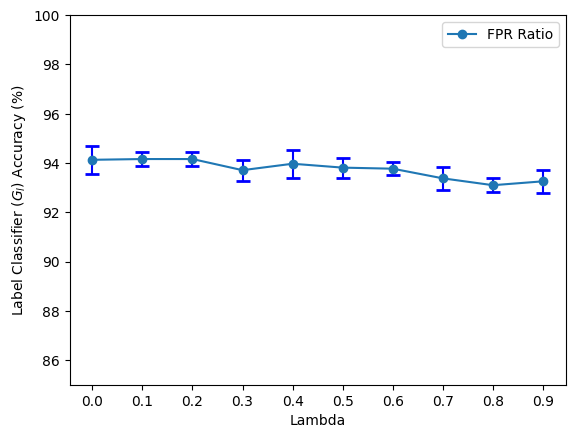

In [247]:
means = [stats['label_overall'][0] for stats in my_stats]
ci = [(stats['label_overall'][2][1]- stats['label_overall'][2][0])/2 for stats in my_stats]

x = lams
    
# Add error bars for the confidence intervals
plt.errorbar(x, means, yerr=ci, fmt='none', capsize=5, capthick=2,ecolor='blue')

plt.plot(x, means, '-o', label='FPR Ratio')




# Add labels and legend
plt.xlabel('Lambda')
plt.ylabel('Label Classifier ($G_l$) Accuracy (%)')
plt.legend()
plt.ylim(85, 100)
#plt.title(r'Overall Accuracy of $G_l$')
plt.xticks(x_tic)
# Show the plot
plt.savefig('label_overall.png', dpi=300)
plt.show()

# Domain Accuracy

[1.7450234067632238, 2.531974311185966, 2.531974311185966, 3.3481551240413694, 2.745624681943987, 3.2455148028369933, 3.7901600741039942, 2.8206097444362044, 3.047668216770802, 3.6346856884969085]
[1.7485524132733303, 1.5995770572418309, 1.5995770572418309, 2.170682912416396, 1.4548644915597038, 1.4749800558770403, 1.7326322652018433, 1.1566171461293209, 1.3507652103333356, 1.09941709980167]


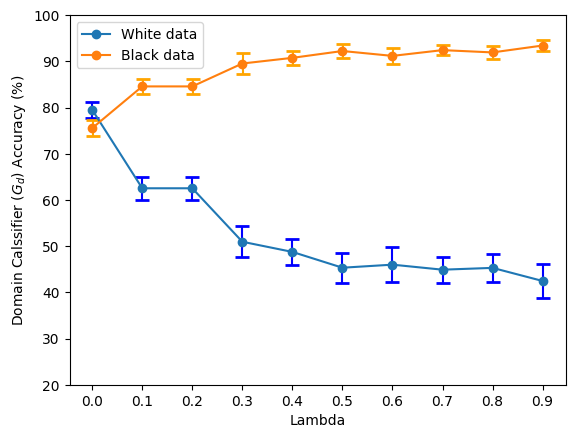

In [248]:
# plot results
white_means = [stats['domain_source'][0] for stats in my_stats]
white_ci = [(stats['domain_source'][2][1]- stats['domain_source'][2][0])/2 for stats in my_stats]
print(white_ci)
#white_ci = [stats[0] for stats in white_ci]
black_means = [stats['domain_target'][0] for stats in my_stats]
black_ci = [(stats['domain_target'][2][1]- stats['domain_target'][2][0])/2 for stats in my_stats]
print(black_ci)
#black_ci = [stats[0] for stats in black_ci]
lams = [0.1*i for i in range(len(my_stats))]
#print(white_means)
#print(white_ci)
#print(lams)

# PLOT DATA

x = lams
x_tic = lams
# Add error bars for the confidence intervals
plt.errorbar(x, white_means, yerr=white_ci, fmt='none', capsize=5, capthick=2, 
             ecolor='blue', color='blue',)
plt.errorbar([i+.001 for i in x], black_means, yerr=black_ci, fmt='none', capsize=5, 
             capthick=2, ecolor='orange')
plt.plot(x, white_means, '-o', label='White data')
plt.plot(x, black_means, '-o', label='Black data')



# Add labels and legend
plt.xlabel('Lambda')
plt.ylabel('Domain Calssifier ($G_d$) Accuracy (%)')
#plt.title(r'Accuracy of $G_d$ by Race')
plt.legend()
plt.ylim(20, 100)
plt.xticks(x_tic)
# Show the plot
plt.savefig('domain_bw.png', dpi=300)
plt.show()

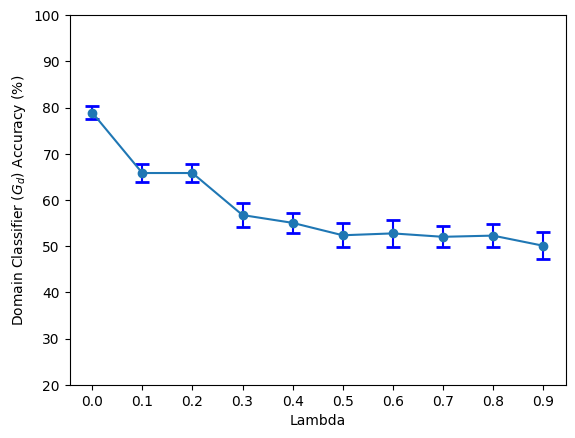

In [260]:
means = [stats['domain_overall'][0] for stats in my_stats]
ci = [(stats['domain_overall'][2][1]- stats['domain_overall'][2][0])/2 for stats in my_stats]

x = lams
    


# Add error bars for the confidence intervals
plt.errorbar(x, means, yerr=ci, fmt='none', capsize=5, capthick=2, 
             ecolor='blue', color ='blue')

plt.plot(x, means, '-o', label='FPR Ratio')
# Add labels and legend
plt.xlabel('Lambda')
plt.ylabel('Domain Classifier ($G_d$) Accuracy (%)')
#plt.legend()
plt.ylim(20, 100)
#plt.title(r'Overall Accuracy of $G_d$')
plt.xticks(x_tic)
# Show the plot
plt.savefig('domain_overall.png', dpi=300)
plt.show()


In [261]:
print(means)

[78.91460205100283, 65.82266993375079, 65.82266993375079, 56.72384063889645, 55.0358471730647, 52.34957800163354, 52.754333424085665, 52.01560940194209, 52.27516108539794, 50.08621472002905]


# Plot False Positive Ratio

[1.2408655467832979, 1.4577867669656046, 1.4577867669656046, 1.3928661725637224, 1.339202974157217, 1.559582299459391, 1.394752021358414, 1.6427887844117701, 1.565946815494714, 1.698629283707964]


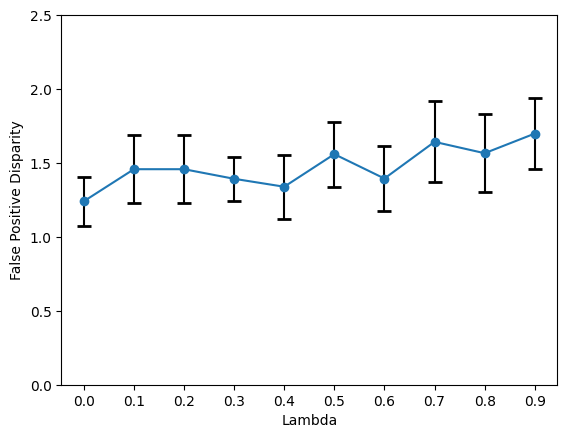

In [251]:
fpr_y = [stat['fpr_ratio'][0] for stat in my_stats]
fpr_ci = [(stat['fpr_ratio'][2][1]-stat['fpr_ratio'][2][0])/2 for stat in my_stats]

x = lams
plt.errorbar(x, fpr_y, yerr=fpr_ci, fmt='none', capsize=5, capthick=2, 
             color = 'black')
plt.plot(x, fpr_y, '-o')

# Add error bars for the confidence intervals


x_tic = lams
# Add labels and legend
plt.xlabel('Lambda')
plt.xticks(x_tic)
plt.ylabel('False Positive Disparity')
#plt.legend()
plt.ylim(0, 2.5)
#plt.title('FPR Ratio vs Lambda')
print(fpr_y)
# Show the plot
plt.savefig('fpr_ratio.png', dpi=300)
plt.show()






[4.481792717086834, 4.191937644623066, 4.191937644623066, 4.54025088296188, 4.247960053586652, 4.340518816222141, 4.420898794300329, 4.659602971623432, 4.966508342467423, 4.567044208987943]


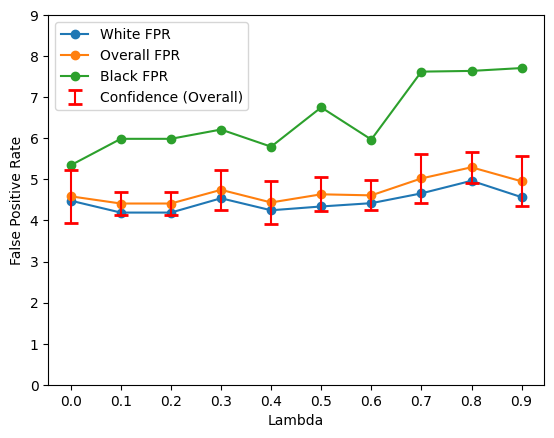

In [263]:
fpr_y = [stat['fpr_overall'][0] for stat in my_stats]
fpr_ci = [(stat['fpr_overall'][2][1]-stat['fpr_overall'][2][0])/2 for stat in my_stats]
fpr_black = [stat['fpr_target'][0] for stat in my_stats]
fpr_black_ci = [(stat['fpr_target'][2][1]-stat['fpr_target'][2][0])/2 for stat in my_stats]
fpr_white = [stat['fpr_source'][0] for stat in my_stats]
fpr_white_ci = [(stat['fpr_source'][2][1]-stat['fpr_source'][2][0])/2 for stat in my_stats]
print(fpr_white)
x = lams
plt.plot(x, fpr_white, '-o', label='White FPR')
plt.plot(x, fpr_y, '-o', label='Overall FPR')
plt.plot(x, fpr_black, '-o', label='Black FPR')

plt.errorbar(x, fpr_y, yerr=fpr_ci, fmt='none', capsize=5, capthick=2, 
             ecolor='red', color='blue', label='Confidence (Overall)')

plt.xticks(x_tic)
plt.legend()
plt.ylim(0, 9)
plt.xlabel('Lambda')
plt.ylabel('False Positive Rate')
plt.savefig('fpr_overall.png', dpi=300)

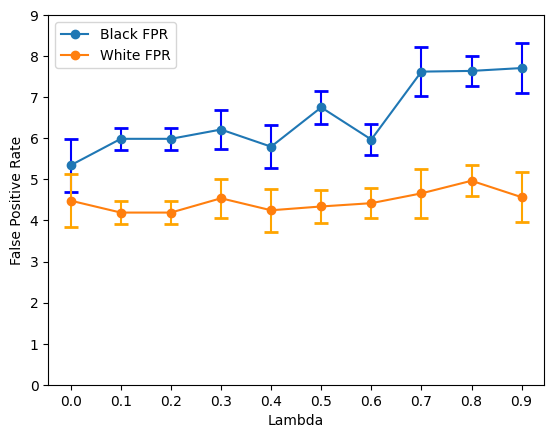

In [255]:

plt.errorbar(x, fpr_black, yerr=fpr_ci, fmt='none', capsize=5, capthick=2, 
             ecolor='blue', color='blue',)
plt.plot(x, fpr_black, '-o', label='Black FPR')
plt.errorbar(x, fpr_white, yerr=fpr_ci, fmt='none', capsize=5, capthick=2, 
             ecolor='orange', color='orange', )
plt.plot(x, fpr_white, '-o', label='White FPR')
plt.legend()
plt.xticks(x_tic)
plt.ylim(0, 9)
plt.xlabel('Lambda')
plt.ylabel('False Positive Rate')
plt.savefig('fpr_bw.png', dpi=300)

# Parity

In [198]:
white_acc = [stats['label_source'][0] for stats in my_stats]
black_acc = [stats['label_target'][0] for stats in my_stats]

white_fpr = [stat['fpr_source'][0] for stat in my_stats]
black_fpr = [stat['fpr_target'][0] for stat in my_stats]

white_len = 3123
black_len =167+383

white_A = 386 # actual positives
white_A_ = white_len-white_A

black_A = 167
black_A_ = 383

white_pp = []
for i in range(len(white_acc)):
    true_neg = white_A_ - (white_fpr[i]*white_A_ /100) # all negatives - false positives
    correct_preds = white_len * (white_acc[i] /100)
    incorrect_preds = white_len-correct_preds
    false_neg = incorrect_preds - (white_fpr[i]*white_A_ /100)
    pp = (correct_preds - true_neg) + (incorrect_preds - false_neg)
    white_pp.append(pp)
    
white_pp_rate = [x / white_len for x in white_pp]
    
black_pp = []
for i in range(len(black_acc)):
    true_neg = black_A_ - (black_fpr[i]*black_A_ / 100) # all negatives - false positives
    correct_preds = black_len * (black_acc[i] / 100)
    incorrect_preds = black_len-correct_preds
    false_neg = incorrect_preds - (black_fpr[i]*black_A_ /100)
    pp = (correct_preds - true_neg) + (incorrect_preds - false_neg)
    black_pp.append(pp)

black_pp_rate = [x / black_len for x in black_pp]

print(white_pp)
print()
print(white_pp_rate)
print()
print(black_pp)
print()
print(black_pp_rate)

[448.46666666666636, 437.5999999999988, 437.5999999999988, 442.2000000000005, 433.79999999999995, 435.26666666666625, 436.0666666666666, 440.3333333333331, 448.1333333333341, 432.9333333333334, 437.73333333333375]

[0.1436012381257337, 0.14012167787383886, 0.14012167787383886, 0.14159462055715674, 0.13890489913544668, 0.13937453303447528, 0.13963069697940014, 0.14099690468566542, 0.14349450314868206, 0.13862738819511156, 0.1401643718646602]

[175.1333333333333, 176.19999999999993, 176.19999999999993, 175.80000000000007, 174.60000000000005, 179.73333333333335, 175.73333333333323, 182.80000000000007, 181.73333333333323, 181.40000000000012, 180.06666666666678]

[0.31842424242424233, 0.32036363636363624, 0.32036363636363624, 0.3196363636363638, 0.31745454545454554, 0.3267878787878788, 0.31951515151515136, 0.33236363636363647, 0.33042424242424223, 0.329818181818182, 0.32739393939393957]


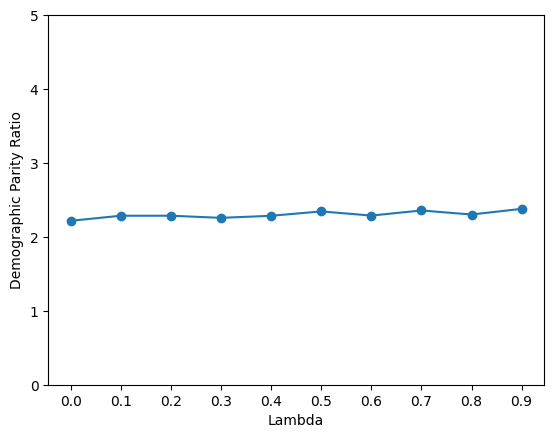

In [262]:
# Parity ratio
pp_ratio = [black_pp_rate[i] /white_pp_rate[i] for i in range(len(lams))]
x = lams
#plt.errorbar(x, fpr_y, yerr=fpr_ci, fmt='none', capsize=5, capthick=2, 
             #ecolor='red', color='red', label='Confidence')
plt.plot(x, pp_ratio, '-o', label='Parity Ratio')
plt.ylim(0, 5)
plt.xticks(x_tic)
plt.xlabel('Lambda')
plt.ylabel('Demographic Parity Ratio')
plt.savefig('paritydisp.png', dpi=300)

(0.0, 10.0)

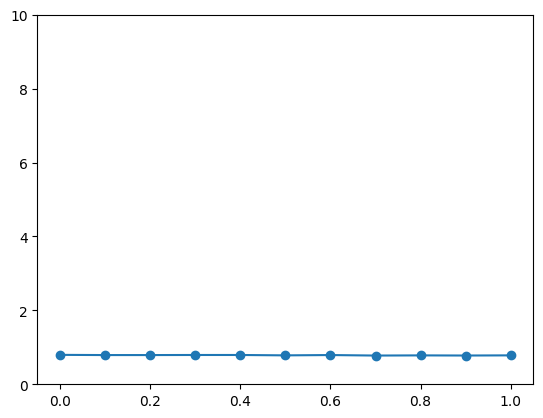

In [200]:

pp_ratio_inv = [(1-black_pp_rate[i]) / (1-white_pp_rate[i]) for i in range(len(lams))]
plt.plot(x, pp_ratio_inv, '-o', label='Parity Ratio')
plt.ylim(0, 10)

In [ ]:
print(my)_